In [1]:
import matplotlib.pyplot as plt
import numpy as np
class FunctionPlotter():
    def __init__(self,function,
    domain=0,CustomDomain=None,
    ticks=[np.linspace(-5,5,5),np.linspace(-5,5,5)],
    lim=[(-5,5),(-5,5)]):
        '''
        params: 
        function: the function to be plotted
        domain: the range of x 
                default: 0: [-5,5]
                1:[0,10]
                2:[-10,0]
                or other array like value of x
        '''
        self.function = function
        self.xticks, self.yticks = ticks[0],ticks[1]
        self.xlim,self.ylim = lim[0],lim[1]
        if domain == 0 :
            self.x = np.linspace(-5,5,101)
        elif domain == 1:
            self.x = np.linspace(0,10,101)
        elif domain == 2:
            self.x = np.linspace(-10,0,101)
        elif domain == 3:
            self.x = CustomDomain
    def canvas(self):
        self.fig,self.ax = plt.subplots()
        self.ax.spines["left"].set_position(("axes", 0.5))
        self.ax.spines["bottom"].set_position(("axes", 0.5))
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        #self.ax.plot(1, 0, ">k", transform=self.ax.get_yaxis_transform(), clip_on=False)
        #self.ax.plot(0, 1, "^k", transform=self.ax.get_xaxis_transform(), clip_on=False)
        self.ax.set_xlabel('x',x=1)
        self.ax.set_ylabel('y',y=1)
        self.ax.set_xticks(self.xticks)
        self.ax.set_yticks(self.yticks)
        self.ax.set_xlim(self.xlim)
        self.ax.set_ylim(self.ylim)
    def plot(self):
        self.y = self.function(self.x)
        self.canvas()
        self.ax.plot(self.x,self.y)
    def PlotMultiFunction(self):
        self.y = [function(self.x) for function in self.function]
        self.canvas()
        for i in range(len(self.function)):
            self.ax.plot(self.x,self.y[i],label='f({})'.format(i+1))
            self.ax.legend()
    def PlotContour(self):
        self.y = self.x
        X,Y = np.meshgrid(self.x,self.y)
        self.canvas()
        self.ax.contour(X,Y,f(X,Y),0)

# Thomas Calculus
## Chapter 6 Applications of Definite Integrals
### 6.3 Arc Length
#### Finding Lengths of Curves
#### Finding Integrals for Lengths of Curves
In Exercises 13–20, do the following.  
a. Set up an integral for the length of the curve.  
b. Graph the curve to see what it looks like.   
c. Use your grapher’s or computer’s integral evaluator to find the curve’s length numerically.

13. $y = x^2, -1 \le x \le 2$  

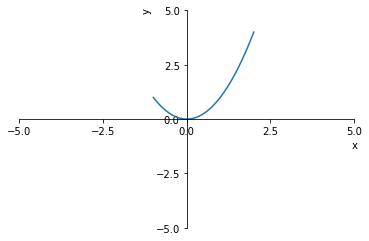

In [21]:
def f(x):
    return x**2
FunctionPlotter(f,3,np.linspace(-1,2,101)).plot()

In [2]:
import scipy.integrate as si
def f(x):
    return np.sqrt(1+4*x**2)
si.quad(f,-1,2)

(6.125726619977547, 6.736774544073218e-08)

#### Theory and Examples
#### COMPUTER EXPLORATIONS
In Exercises 35–40, use a CAS to perform the following steps for the given graph of the function over the closed interval.   
a. Plot the curve together with the polygonal path approximations for $n = 2, 4, 8$ partition points over the interval. (See Figure 6.22.)    
b. Find the corresponding approximation to the length of the curve by summing the lengths of the line segments.  
c. Evaluate the length of the curve using an integral. Compare your approximations for $n = 2, 4, 8$ with the actual length given by the integral. How does the actual length compare with the approximations as $n$ increases? Explain your answer.

35. $f(x) = \sqrt{1 - x^2}, -1 \le x \le 1$

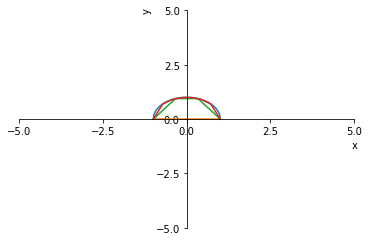

In [7]:
def f(x):
    return np.sqrt(1-x**2)
plotter = FunctionPlotter(f,3,np.linspace(-1,1,101))
plotter.plot()
x = np.linspace(-1,1,2)
x2 = np.linspace(-1,1,4)
x3 = np.linspace(-1,1,8)
plotter.ax.plot(x,f(x))
plotter.ax.plot(x2,f(x2))
plotter.ax.plot(x3,f(x3))

In [20]:
def length(x,y):
    l = 0
    points = []
    for i in range(len(x)):
        points.append((x[i],y[i]))
    p = points[0]
    for (i,j) in points[1:]:
        l += np.sqrt((p[0]-i)**2+(p[1]-j)**2)
        p = (i,j)
    return l
print(length(x,f(x)))
print(length(x2,f(x2)))
print(length(x3,f(x3)))

2.0
2.97606774342517
3.096194954379304


In [2]:
def f(x):
    return np.sqrt(1/(1-x**2))
import scipy.integrate as si
si.quad(f,-1,1)

(3.1415926535896266, 6.20071105572606e-10)

### 6.4 Areas of Surfaces of Revolution
#### Finding Integrals for Surface Area
In Exercises 1–8:   
a. Set up an integral for the area of the surface generated by revolving the given curve about the indicated axis.   
b. Graph the curve to see what it looks like. If you can, graph the surface too.  
c. Use your utility’s integral evaluator to find the surface’s area numerically.

1. $y = \tan x, 0 \le x \le \dfrac{\pi}{4}; x$-axis 

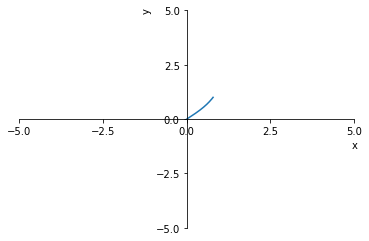

In [3]:
def f(x):
    return np.tan(x)
FunctionPlotter(f,3,np.linspace(0,np.pi/4,1001)).plot()

In [4]:
def f(x):
    return 2*np.pi*np.tan(x)*np.sqrt(1+(1/np.cos(x))**4)
si.quad(f,0,np.pi/4)

(3.8390770445032536, 4.262231728117409e-14)